<a href="https://colab.research.google.com/github/RAJAS-KAR/ML_GUVI_Task7/blob/main/KNN_Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing the dataset**

In [24]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [25]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [29]:
df.drop(columns =["User ID", "Gender"], inplace = True)

In [30]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [31]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**Splitting the dataset into the Training set and Test set**

In [32]:
x = df.drop(["Purchased"], axis = 1)
y = df["Purchased"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

**Feature Scaling**

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Fitting K-NN to the Training set**

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,30):
  knn = KNeighborsClassifier(i)
  knn.fit(x_train, y_train)
  print("K Value :", i, "train score :", knn.score(x_train,y_train), "cv score :", np.mean(cross_val_score(knn, x_train, y_train, cv =10)))


K Value : 1 train score : 1.0 cv score : 0.8928571428571427
K Value : 2 train score : 0.95 cv score : 0.8428571428571429
K Value : 3 train score : 0.9428571428571428 cv score : 0.925
K Value : 4 train score : 0.925 cv score : 0.9107142857142858
K Value : 5 train score : 0.9357142857142857 cv score : 0.925
K Value : 6 train score : 0.9357142857142857 cv score : 0.9214285714285714
K Value : 7 train score : 0.925 cv score : 0.9214285714285715
K Value : 8 train score : 0.925 cv score : 0.9214285714285714
K Value : 9 train score : 0.9285714285714286 cv score : 0.9214285714285714
K Value : 10 train score : 0.9321428571428572 cv score : 0.9214285714285715
K Value : 11 train score : 0.9285714285714286 cv score : 0.9178571428571429
K Value : 12 train score : 0.925 cv score : 0.9178571428571429
K Value : 13 train score : 0.9178571428571428 cv score : 0.9214285714285715
K Value : 14 train score : 0.9178571428571428 cv score : 0.9214285714285715
K Value : 15 train score : 0.9214285714285714 cv sco

In [40]:
knn = KNeighborsClassifier(10)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8833333333333333

**Predicting the Test set results**

In [41]:
from sklearn import metrics
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8833333333333333


In [42]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.8444444444444444

**Making the Confusion Matrix**

In [44]:
from sklearn.metrics import confusion_matrix
matrixs = confusion_matrix(y_test, y_pred)
matrixs

array([[68,  9],
       [ 5, 38]])

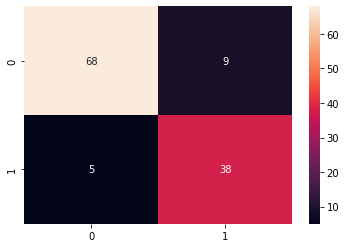

In [48]:
import seaborn as sns
sns.heatmap(matrixs, annot = True)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


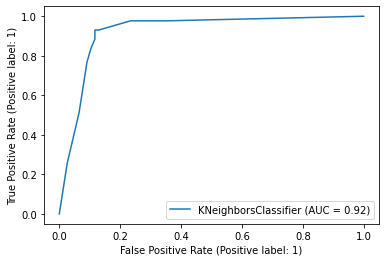

In [49]:
from sklearn.metrics import plot_roc_curve, roc_curve
plot_roc_curve(knn, x_test, y_test)